# EX 2 - 
In this part you will implement the two methods for Regression task and un-
derstand practically how difierent parameters efiect the result.
A template code named regression.ipyn is attended to the exercises. In the
template you will find a variable called max poly deg. This variable will afiect
maximum polynomial fitting to the data. You will proved with three difierent
data sets make sure that your code support them.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:

def polynomial_features(x_poly):
    X = []
    for i in range(len(x_poly)):
        temp = []
        for j in range(max_poly_deg + 1): # add 1 for bias
            temp.append(x[i]**j)
        X.append(np.array(temp))
    return np.array(X)



In [4]:
def normal_regression(X,Y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

In [5]:
def gradient_descent(X, Y, learn_rate = 0.01, iterations = 10000):
    n = len(X) # number of input X
    w = np.random.randn(max_poly_deg+1) 
    
    i=0
    while(True):
        prediction = w.dot(X.T) 
        w = w - (learn_rate/n)*(prediction - Y).dot(X)
        i=i+1
        if(i==iterations):
            break
    
    return w

In [22]:
def plot_prediction(X,Y,W, title):
    prediction = X.dot(W)
    plt.plot(x,prediction,label='prediction')
    plt.plot(x,y,label='data')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title(title)
    plt.show()

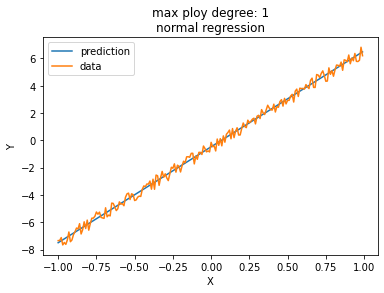

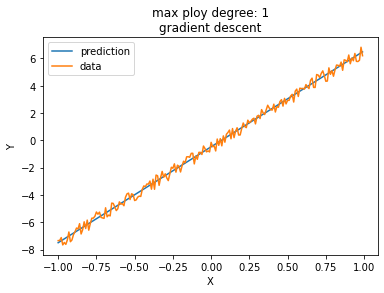

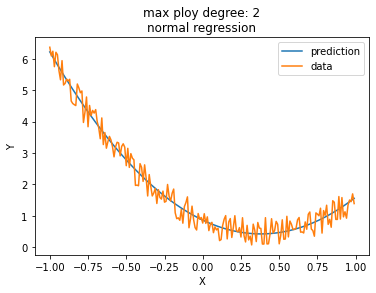

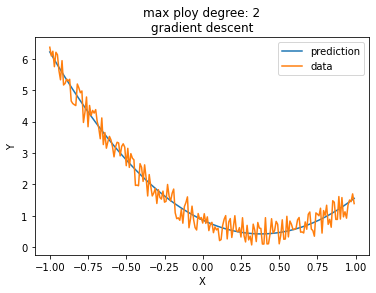

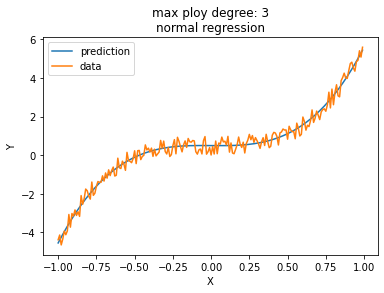

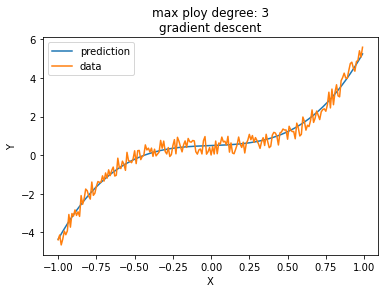

In [23]:
for i, max_poly_deg in enumerate(range(3)):
    j = i+1
    max_poly_deg = j
    x = np.load(f'x_train_{j}.npy')
    y = np.load(f'y_train_{j}.npy')
    X = polynomial_features(x)
    
    weight_normal = normal_regression(X, y)
    plot_prediction(X, y, weight_normal, f'max ploy degree: {j}\nnormal regression')
    
    weight_gradient = gradient_descent(X, y)
    plot_prediction(X, y, weight_gradient, f'max ploy degree: {j}\ngradient descent')
    